#Title: Customer Churn Prediction Analysis and Reduction Strategies


#Problem Statement:

Customer churn is a critical challenge for businesses, impacting long-term profitability and growth. Identifying customers who are likely to churn allows businesses to take proactive measures to improve retention. Currently, there is a need to accurately predict customer churn to inform strategic interventions.

This project aims to develop a machine learning model that predicts whether a customer will churn based on the provided dataset (‘dataset.csv’). The objective is to analyze the dataset, visualize key trends and patterns related to churn, and provide actionable insights to reduce the churn rate. By splitting the data into training and testing sets, the model will be trained to classify customers as likely to churn or remain, enabling more targeted retention strategies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#load the date
df = pd.read_csv(r'/content/drive/MyDrive/phoenix_analytics/Copy of dataset.csv')
df.head(2)

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155


In [ ]:
df.shape

(43718, 17)

In [ ]:
df.dtypes

,0
order_id,object
customer_number,object
transaction_date,object
description,object
total_qty,int64
net_total,float64
loyalty_amount,int64
loyalty_points,int64
discount_amount,float64
customer_group,object


#Data Cleaning Steps

• Converted "Date" columns (transaction_date, delivery_date) to appropriate data types

• Identified and removed 10 duplicate records

• Assessed missing data (no missing values found)

In [ ]:
#Convert date columns from object to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%d/%m/%Y')


In [ ]:
df.duplicated().sum()

10

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43708 entries, 0 to 43717
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    43708 non-null  object        
 1   customer_number             43708 non-null  object        
 2   transaction_date            43708 non-null  datetime64[ns]
 3   description                 43708 non-null  object        
 4   total_qty                   43708 non-null  int64         
 5   net_total                   43708 non-null  float64       
 6   loyalty_amount              43708 non-null  int64         
 7   loyalty_points              43708 non-null  int64         
 8   discount_amount             43708 non-null  float64       
 9   customer_group              43708 non-null  object        
 10  territory                   43708 non-null  object        
 11  delivery_date               43708 non-null  datetime64[ns]


In [ ]:
df['customer_number'].nunique()

3397

# Defining Churn
• Defined churn as a customer having no orders in the last 30 days

• Identified last transaction date for each customer

• Determined the latest date in the dataset

• Set churn threshold (30 days before the latest date)

• Created a new ’churn’ column (1 for churned, 0 for active)

In [ ]:
#last day of purchase in the data
last_transaction = df['transaction_date'].max()

# Calculate each customer's last purchase date
df['last_purchase'] = df.groupby('customer_number')['transaction_date'].transform('max')

# Calculate the difference between the last transaction date and each customer's last purchase date
df['days_since_last_purchase'] = (last_transaction - df['last_purchase']).dt.days

# drop 'last_purchase' column
df.drop('last_purchase', axis=1, inplace=True)

# Create churn column
df['churn'] = ((df['days_since_last_purchase'] > 30)).astype(int)

df.head(2)


,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,days_since_last_purchase,churn
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,2022-03-28,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,2022-03-29,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,3,0
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,2022-03-28,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,2022-03-29,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,3,0


# Exploratory Data Analysis

**Descriptive Statistics**

Key Insights:

• Average quantity per transaction: 6.60 (range: 1 to 500)

• Average net total per transaction: KES 10,463.88 (high standard deviation:
30,236.79)

• No recorded activity for loyalty amounts or points

• Average discount amount: KES 178.74 (max: KES 20,231.25)

• Geographic focus: likely East Africa (Kenya) based on coordinates

In [ ]:
#Average quantity per transaction
df['total_qty'].mean()

6.60135444312254

In [ ]:
#Range of quantity per transaction
df['total_qty'].min(), df['total_qty'].max()

(1, 500)

In [ ]:
#Average net total per transaction
df['net_total'].mean()

10463.88472384918

In [ ]:
#Standard deviation of net total per transacrion
df['net_total'].std()

30236.79480353975

In [ ]:
#Sum of loyalty amount
df['loyalty_amount'].sum()

0

# Univariate Analysis

• Churn Distribution: 97.1% active, 2.9% churned

• Territories: Kawangware, Juja, and Eastlands are dominant

• Customer Groups: Majority are individuals

• Net Total Orders: Highly skewed distribution

• Total Quantity in Orders: Right-skewed distribution

• Discount Amount: Heavily right-skewed

In [ ]:
# Step 1: Get the distribution of the churn column
churn_distribution = df['churn'].value_counts()
churn_distribution

,count
churn,
0,42627
1,1081


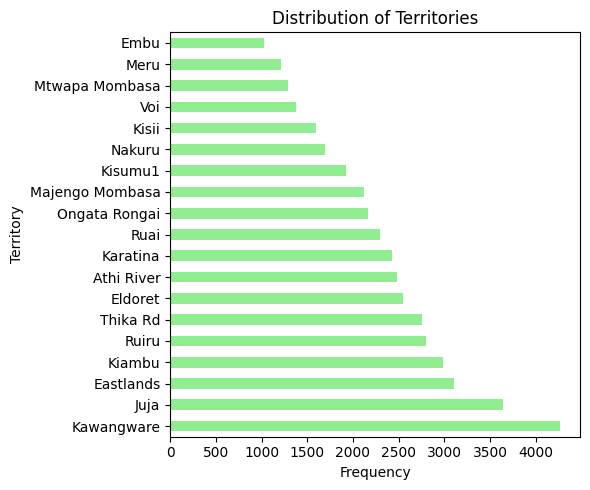

In [ ]:
# Distribution of the territories
territories = df['territory'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(6, 5))
territories.plot(kind='barh', color='lightgreen')

# Add labels and title
plt.title('Distribution of Territories')
plt.xlabel('Frequency')  # Now the frequency is on the x-axis
plt.ylabel('Territory')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#Customer Groups
customers = df['customer_group'].value_counts()
customers

,count
customer_group,
Individual,43596
All Customer Groups,112


In [ ]:
df.columns

Index(['order_id', 'customer_number', 'transaction_date', 'description',
       'total_qty', 'net_total', 'loyalty_amount', 'loyalty_points',
       'discount_amount', 'customer_group', 'territory', 'delivery_date',
       'delivery_window_end_time', 'delivery_window_start_time',
       'set_warehouse', 'duka_latitude', 'duka_longitude',
       'days_since_last_purchase', 'churn'],
      dtype='object')

#Bivariate & Multivariate Analysis
**1 Bivariate Analysis**

• Churn Rate by Customer Group: Higher for individuals

• Churn Rate by Territory: Highest in Nakuru , lowest in Ruai

• Total Quantity vs. Net Total: Positive correlation

• Discount Amount vs. Net Total: Positive correlation, distinct groupings

• Churn Status vs. Discount Amount: Higher discounts associated with better retention

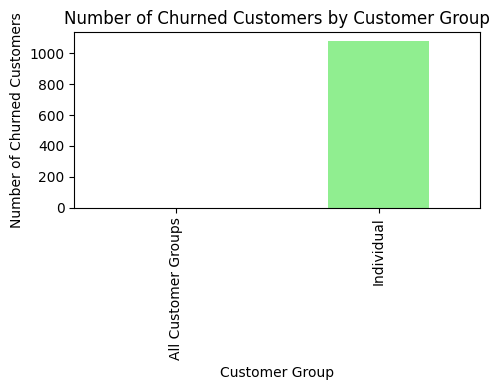

In [ ]:
# Churn count by Customer group
churn_by_group = df.groupby('customer_group')['churn'].sum()

# Plot the number of customers who churned per customer group
plt.figure(figsize=(5, 4))
churn_by_group.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.title('Number of Churned Customers by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()

# Display the plot
plt.show()


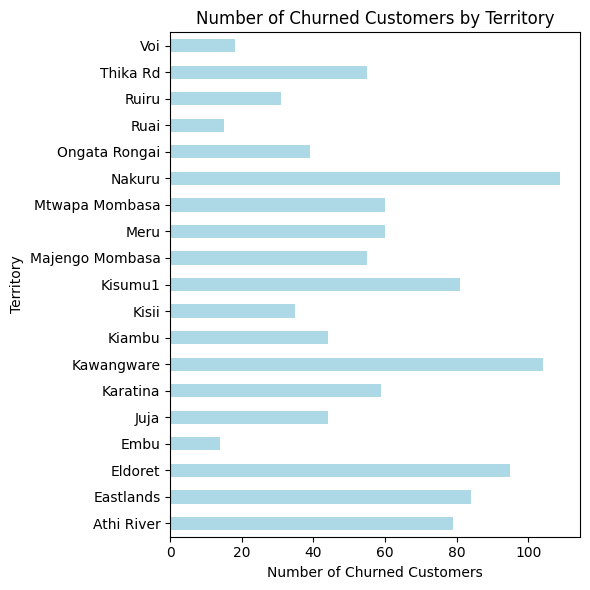

In [ ]:
# Churn count by Territory
churn_by_territory = df.groupby('territory')['churn'].sum()

# Plot the number of customers who churned by territory
plt.figure(figsize=(6, 6))
bars = churn_by_territory.plot(kind='barh', color='lightblue')

# Add labels and title
plt.title('Number of Churned Customers by Territory')
plt.xlabel('Number of Churned Customers')  # Adjusted label for count
plt.ylabel('Territory')
plt.tight_layout()

# Display the plot
plt.show()



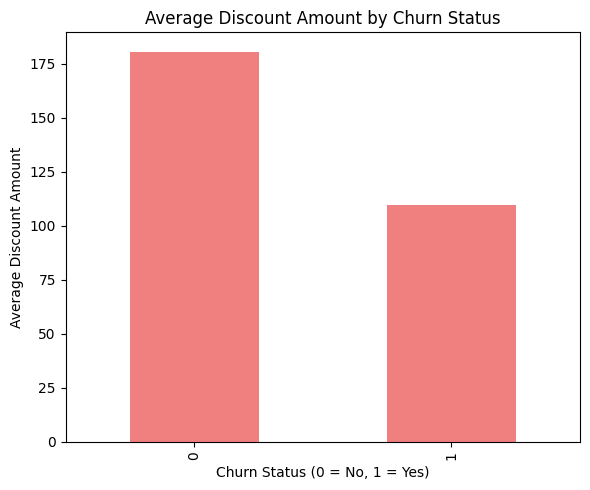

In [ ]:
# Churn status vs average discount amount
avg_discount_by_churn = df.groupby('churn')['discount_amount'].mean()

# Plot the average discount amount by churn status
plt.figure(figsize=(6, 5))
avg_discount_by_churn.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Average Discount Amount by Churn Status')
plt.xlabel('Churn Status (0 = No, 1 = Yes)')
plt.ylabel('Average Discount Amount')
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df.columns

Index(['order_id', 'customer_number', 'transaction_date', 'description',
       'total_qty', 'net_total', 'loyalty_amount', 'loyalty_points',
       'discount_amount', 'customer_group', 'territory', 'delivery_date',
       'delivery_window_end_time', 'delivery_window_start_time',
       'set_warehouse', 'duka_latitude', 'duka_longitude',
       'days_since_last_purchase', 'churn'],
      dtype='object')

#Multivariate Analysis

Correlation Insights:

• Strong positive correlation between total_qty and net_total (0.85)

• Strong positive correlation between total_qty and discount_amount (0.81)

• Very strong positive correlation between net_total and discount_amount (0.90)

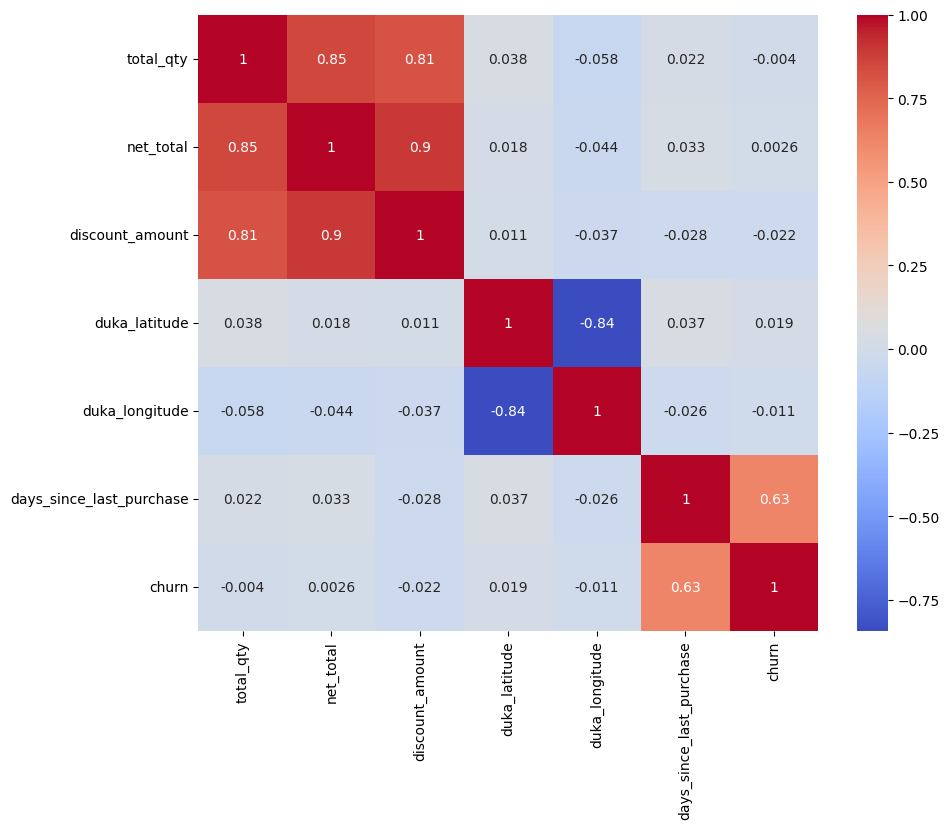

In [ ]:
# Select the relevant columns for the heatmap
df1 = df[['total_qty', 'net_total', 'discount_amount', 'duka_latitude', 'duka_longitude', 'days_since_last_purchase', 'churn']]
# Plot the heatmap for numerical values in the selected DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()


#Feature Engineering
• Created Order Frequency column

• Created Average Order Value Frequency column

• Created Total Discounts column

• Created Delivery Time column

• Encoded Customer Group column

• Encoded Territory column

• Created Discount Percentage column

In [ ]:
#Create Order Frequency column
df['order_frequency'] = df.groupby('customer_number')['order_id'].transform('count')

In [ ]:
# Create Average Order Value Frequency column
df['avg_order_value'] = df.groupby('customer_number')['net_total'].transform('mean')

In [ ]:
#Create Total Discounts column
df['total_discounts'] = df.groupby('customer_number')['discount_amount'].transform('sum')

In [ ]:
# Create Delivery Time column
df['delivery_time'] = (pd.to_datetime(df['delivery_date']) - pd.to_datetime(df['transaction_date'])).dt.days

In [ ]:
#Encode Customer Group column
label_encoder = LabelEncoder()
df['customer_group_encoded'] = label_encoder.fit_transform(df['customer_group'])

In [ ]:
# Encode Territory column
df['territory_encoded'] = label_encoder.fit_transform(df['territory'])

In [ ]:
#Create Discount Percentage column
df['discount_percentage'] = (df['discount_amount'] / df['net_total']) * 100

#Data Modeling
**Data Preparation**

• Created feature matrix and target vector

• Split the data into training and test sets

• Scaled the data

In [ ]:
#Create a feature matrix for the model
X = df[['order_frequency','total_qty','net_total','total_discounts','territory_encoded',
         'customer_group_encoded','avg_order_value','delivery_time' ]]
#Create a target vector for the model
y = df['churn']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Dealing with Class Imbalance
Applied SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
#SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
#Fit logistic regression and random forest model
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = lr.predict(X_test_scaled)

#Evaluate our model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      8519
           1       0.12      0.92      0.21       223

    accuracy                           0.82      8742
   macro avg       0.56      0.87      0.56      8742
weighted avg       0.98      0.82      0.88      8742



In [ ]:
#fit a randomforest classifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred = rf.predict(X_test_scaled)

#Evaluate our model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8519
           1       0.81      0.87      0.84       223

    accuracy                           0.99      8742
   macro avg       0.90      0.93      0.92      8742
weighted avg       0.99      0.99      0.99      8742



In [ ]:
#Fit a Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(class_report)





Accuracy: 98.98%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8519
           1       0.75      0.89      0.82       223

    accuracy                           0.99      8742
   macro avg       0.88      0.94      0.91      8742
weighted avg       0.99      0.99      0.99      8742



#Summary of Findings
**Data Overview:**

The dataset consists of 43,718 records across 17 variables, including identifiers, dates, descrip-
tions, quantities, financial amounts, customer information, geographic coordinates, and timestamps. After removing 10 duplicate records, the dataset was found to have no missing values.

**Churn Definition and Analysis**

Churn was defined as a customer having no orders in the last 30 days. The analysis revealed that 2.9

**Customer Segmentation**

The majority of customers are individuals, while the "All Customer Groups" category represents a small portion of the customer base.

**Churn Analysis**

The highest churn rates are observed in Nakuru (6.74%), Mtwapa Mombasa (5.67%), Kisumu1 (5.42%), and Eldoret (4.79%), while the lowest churn rates are in Ruai (0.74%), Juja (1.23%) and Voi (1.31%).

**Correlation Analysis**

Total quantity and net total had Strong positive correlation of 0.85

Total quantity and discount amount had  Strong positive correlation of 0.81

Net total and discount amount have a Very strong positive correlation of  0.90


#RECOMMENDATIONS
**My three main ideas on how to decrease the churn rate are:**

1. Targeted Retention Strategies for High-Churn Territories -  Focus on implementing targeted retention strategies in high-churn territories,particularly Nakuru, Mtwapa Mombasa, Kisumu1, and Eldoret.

2. Revamp and Relaunch Loyalty Program - Conduct a comprehensive review of the current loyalty program structure and benefits to identify gaps and areas for improvement.

3. Optimize Discount Strategies -

• Analyze the impact of different discount levels on customer retention and lifetime value,
identifying optimal discount rates that maximize revenue without eroding profit margins.

• Implement a dynamic pricing model that offers personalized discounts based on customer
purchase history and churn risk, tailoring discounts to individual customer profiles.